## <span style='color:blue;'>The Log Transformations</span>  
Log Transformation (การแปลงลอการิทึม) เป็นเทคนิคการประมวลผลภาพ (image enhancement) ที่ใช้ปรับปรุงความเปรียบต่าง (contrast) ของภาพ โดยเฉพาะในพื้นที่ที่มืด เทคนิคนี้มีประสิทธิภาพสูงสำหรับภาพที่มี dynamic range สูง (ค่าแตกต่างกันมาก)

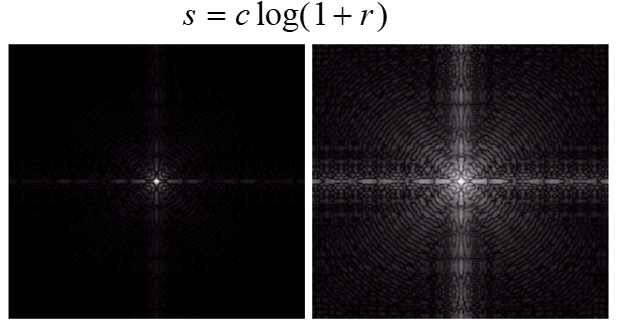

Here's a brief explanation of how it works:

1. **<i><span style='color:blue;'> A Log Transformations Function:</span> </i>** The core of this method is the logarithm transformation function, which is defined as  **<i><span style='color:blue;'> s=c⋅log(1+r)</span> </i>** ,  where: **<i>s</i>** is the output pixel value. **<i>r</i>** is the input pixel value. **<i>c</i>** is positive a constant.
    - **s** = ค่าพิกเซลผลลัพธ์ (output pixel value)
    - **r** = ค่าพิกเซลต้นฉบับ (input pixel value)
    - **c** = ค่าคงที่สำหรับปรับสเกล (scale constant)
    - **log** = ลอการิทึมฐาน e (natural logarithm)

**หลักการทำงาน:** Log transformation ทำการแมปค่าพิกเซลในภาพไปยังสเกลลอการิทึม ซึ่งจะ:
- **ขยาย (expand)** พิกเซลมืด → ทำให้เห็นรายละเอียดมากขึ้น ✓
- **อัด (compress)** พิกเซลสว่าง → ลดความสว่างมากเกินไป ✓

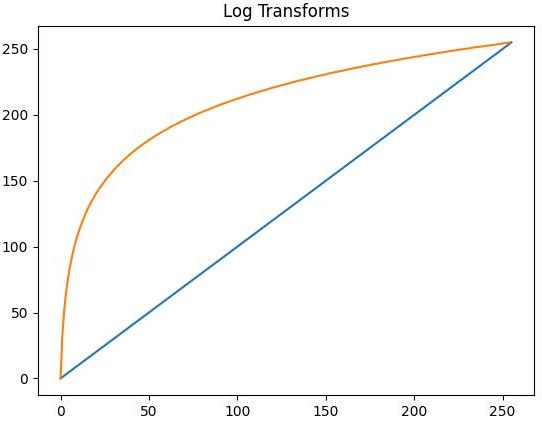

2. **<i><span style='color:blue;'>The constant  c</span> </i>** is often chosen to design as  **<i>255/(np.log(1+ np.max(x)))</i>**. **เหตุผล:** เพื่อให้ค่าผลลัพธ์สูงสุด = 255 (เต็มสเกล 8-bit)

3. **<i><span style='color:blue;'>Application:</span> </i>**  This transformation is applied to each pixel in the image. For color images, it can be applied to each color channel independently.

### เหตุใดต้อง +1 ในสูตร:
- ถ้า r = 0 → log(0) = undefined (ไม่มีค่า)
- ถ้า r = 0 → log(1 + 0) = log(1) = 0 ✓ (แก้ปัญหา)

### การประยุกต์ใช้

1. **ใช้กับแต่ละพิกเซล** ในภาพ
2. **สำหรับภาพสี:** สามารถใช้กับแต่ละช่อง (channel) แยกกัน
3. **ประโยชน์:** ปรับปรุงภาพที่มี dynamic range สูง โดยเฉพาะภาพมืด


### ขั้นตอนการทำงาน (Step-by-step)
1. อ่านภาพ:
    ```py
    img = cv2.imread("./images/dark2.png", 0)
    ```
2. แปลงเป็น float:
    ```py
    img_float = img.astype(np.float16)
    ```
3. คำนวณค่า c:
    ```py
    c = 255 / (np.log(1 + np.amax(img_float)))
    ```
4. Apply log transformation:
    ```py
    log_img = c * np.log(1 + img_float)
    ```
5. แปลงกลับเป็น uint8:
    ```py
    log_img = log_img.astype(np.uint8)
    ```
6. แสดงภาพ:
    ```py
    plt.imshow(log_img, cmap='gray')
    plt.show()
    ```





## <span style='color:lightblue;'>Let's start</span>  

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### <span style='color:lightgreen;'>Read Image</span>  

In [5]:
img = cv2.imread("./images/dark2.png", 0)

In [ ]:
img_float = img.astype(np.float16)
c = 255/(np.log(1+ np.amax(img_float)))
"""
ไม่มี c:
log(1+r) ให้ค่า 0-5.30
  ↓
ภาพจะมืดมาก (ค่าเล็ก)

มี c:
c × log(1+r) ให้ค่า 0-255
  ↓
ภาพสว่างและใช้เต็มสเกล 8-bit ✓S
""" 
print(np.amax(img_float), np.log(1+ np.amax(img_float))) 


50.0 3.932


### <span style='color:lightgreen;'>Method I of The Logarithm Transformation</span>  

In [7]:
log_img = c * np.log(1 + img_float) 
log_img = log_img.astype(np.uint8)

In [8]:
cv2.imshow("result", log_img)
cv2.waitKey()
cv2.destroyAllWindows()

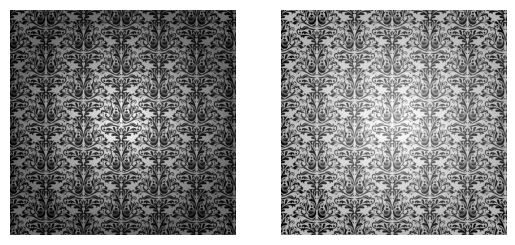

In [9]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(log_img, cmap='gray')
plt.axis('off')

plt.show()

### <span style='color:lightgreen;'>Method II of  The Logarithm Transformation</span>  

In [10]:
log_img1 = np.zeros_like(img, dtype='float')
row, col = log_img1.shape
print(row,col)

700 700


In [11]:
for i in range(row):
    for j in range(col):
        log_img1[i,j] =  c * np.log(1 + img_float[i,j]) 

log_img1 = log_img1.astype(np.uint8) 

In [12]:
cv2.imshow("result", log_img1)
cv2.waitKey()
cv2.destroyAllWindows()

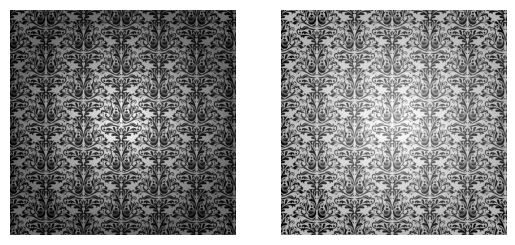

In [13]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(log_img1, cmap='gray')
plt.axis('off')

plt.show()

### <span style='color:lightgreen;'>>Method III of  The Logarithm Transformation</span>  

In [14]:
table = np.array([ i for i in range(256)]).astype(np.float16)
log_table = c* np.log(1 + table) 
log_table = log_table.astype(np.uint8)

In [15]:
log_img2 = cv2.LUT(img, log_table)

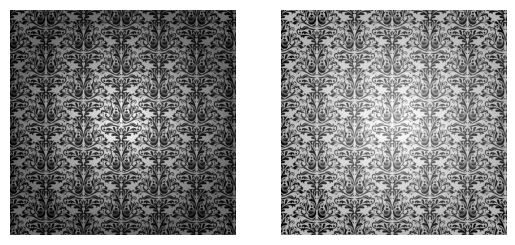

In [16]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(log_img2, cmap='gray')
plt.axis('off')

plt.show()

ข้อควรระวัง

⚠ ต้องแปลงเป็น float ก่อน (ไม่ใช้ uint8 โดยตรง)

⚠ ต้องมี +1 ในสูตร (ป้องกัน log(0))

⚠ ต้องคำนวณ c ให้ถูกต้อง

⚠ ไม่ควรใช้ loop เพราะช้ามาก

⚠ LUT ดีที่สุดสำหรับ batch processing